# Chapter: Decision Trees and Ensemble Learning for Fault Detection


# Topic: Fault classification via Random Forests for gas boilers

In [1]:
import pandas as pd

df = pd.read_csv('D:\WORK\Project_Year4\Machine_Learning_for_PM_and_PdM\Chapter13_DT_RF_Ensemble\Boiler_emulator_dataset.txt')
print(df.head())

   Fuel_Mdot  Tair  Treturn     Tsupply  Water_Mdot Condition      Class
0          1   283    333.0  363.574744         3.0    %=0.05       Lean
1          1   283    333.0  362.349517         3.0     %=0.1    Nominal
2          1   283    333.0  361.216941         3.0    %=0.15  ExcessAir
3          1   283    333.0  360.166890         3.0    %=0.20  ExcessAir
4          1   283    333.0  359.190662         3.0    %=0.25  ExcessAir


In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

plt.rcParams.update({'font.size': 12})

['ExcessAir' 'Fouling' 'Nominal' 'Scaling']


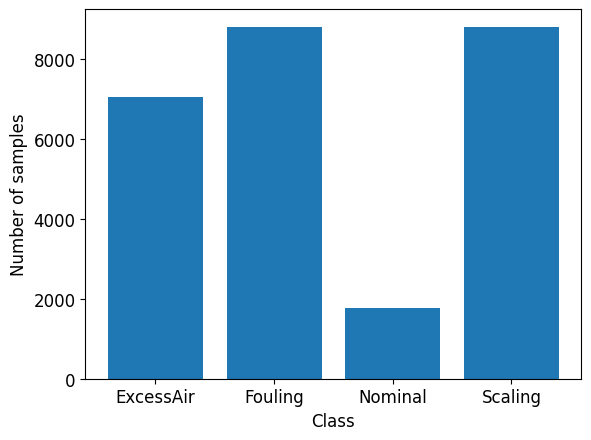

In [3]:
data = pd.read_csv('Boiler_emulator_dataset.txt', delimiter=',')

data.drop(data[data.Class == 'Lean'].index, inplace=True) # remove rows where Class is Lean
input_data = data.iloc[:,[0,1,3,4]].values # dropping column Treturn
output_label_text = data.iloc[:,-1]

# convert text labels to numeric labels
le = LabelEncoder()
le.fit(output_label_text)
print(le.classes_)

output_labels = le.transform(output_label_text)

#check number of samples for each class
unique_labels, counts = np.unique(output_labels, return_counts=True)

plt.figure()
plt.bar(unique_labels, counts)
plt.xlabel('Class'), plt.ylabel('Number of samples')
plt.xticks(range(4) ,labels=le.classes_)
plt.show()

In [4]:
# separate training and test data
X_train, X_test, y_train, y_test = train_test_split(input_data, output_labels, test_size=0.3, stratify=output_labels, random_state=1)

In [5]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#  fit random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

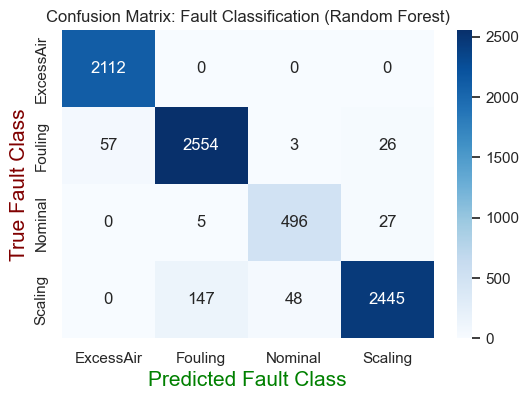

In [7]:
# generate and plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sn.set(font_scale=1) # for label size
sn.heatmap(conf_mat, fmt='.0f', annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('True Fault Class', fontsize=15, color='maroon')
plt.xlabel('Predicted Fault Class', fontsize=15, color='green')
plt.title('Confusion Matrix: Fault Classification (Random Forest)')
plt.show()

In [8]:
# Descriptive Statistics: mean, std, min, max, etc. by class
df = data.copy()
df['Class_num'] = output_labels 
stat_by_class = df.groupby('Class_num').describe()
print(stat_by_class)


          Fuel_Mdot                                              Tair         \
              count mean       std  min   25%  50%   75%  max   count   mean   
Class_num                                                                      
0            7040.0  2.5  1.118113  1.0  1.75  2.5  3.25  4.0  7040.0  293.0   
1            8800.0  2.5  1.118098  1.0  1.75  2.5  3.25  4.0  8800.0  293.0   
2            1760.0  2.5  1.118352  1.0  1.75  2.5  3.25  4.0  1760.0  293.0   
3            8800.0  2.5  1.118098  1.0  1.75  2.5  3.25  4.0  8800.0  293.0   

           ...     Tsupply             Water_Mdot                              \
           ...         75%         max      count  mean       std  min    25%   
Class_num  ...                                                                  
0          ...  347.378160  361.530589     7040.0  7.75  2.883345  3.0  5.375   
1          ...  342.957271  363.834650     8800.0  7.75  2.883304  3.0  5.375   
2          ...  350.678960  365.29

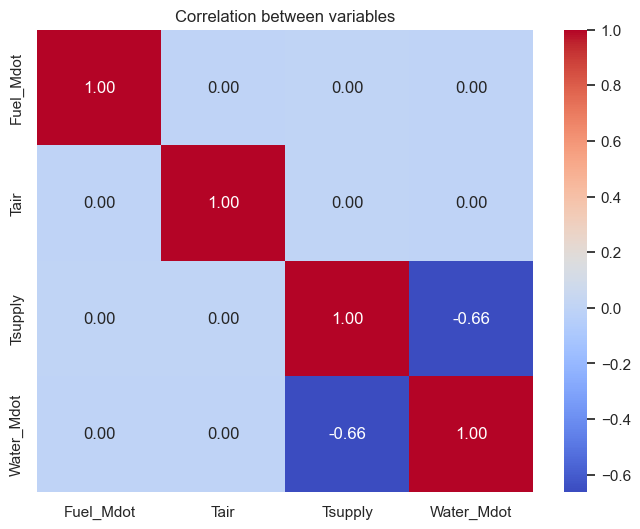

In [9]:
# Heatmap (correlation matrix)
import seaborn as sns
corr = df.iloc[:, [0,1,3,4]].corr() 
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between variables")
plt.show()


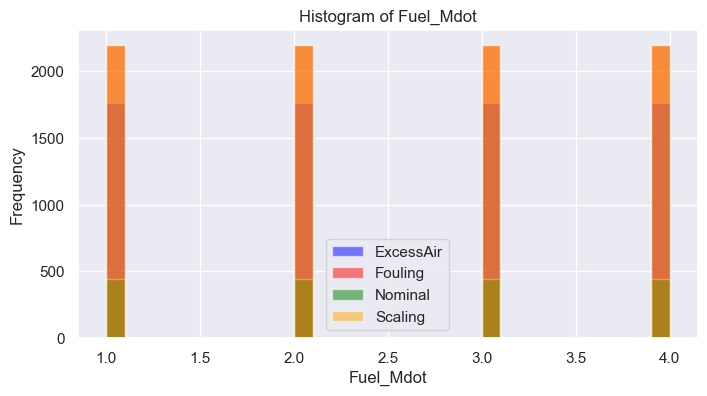

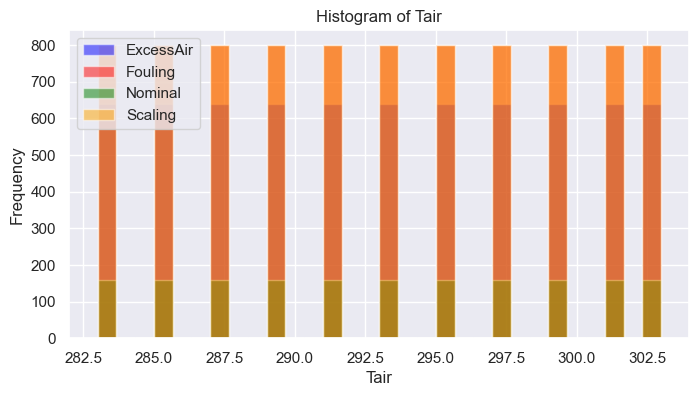

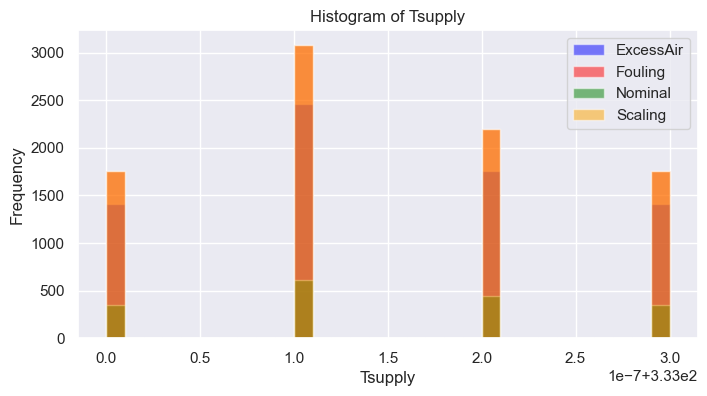

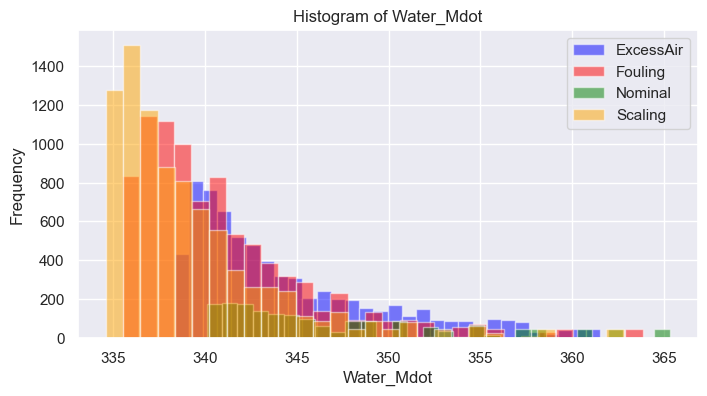

In [10]:
# Histogram ซ้อนกันของแต่ละคลาส
feature_names = data.columns[[0,1,3,4]]
class_names = le.classes_
colors = ['blue', 'red', 'green', 'orange']

for i, col in enumerate(feature_names):
    plt.figure(figsize=(8,4))
    for cls in range(len(class_names)):
        subset = data[output_labels == cls]
        plt.hist(subset.iloc[:,i], bins=30, alpha=0.5, label=class_names[cls], color=colors[cls])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


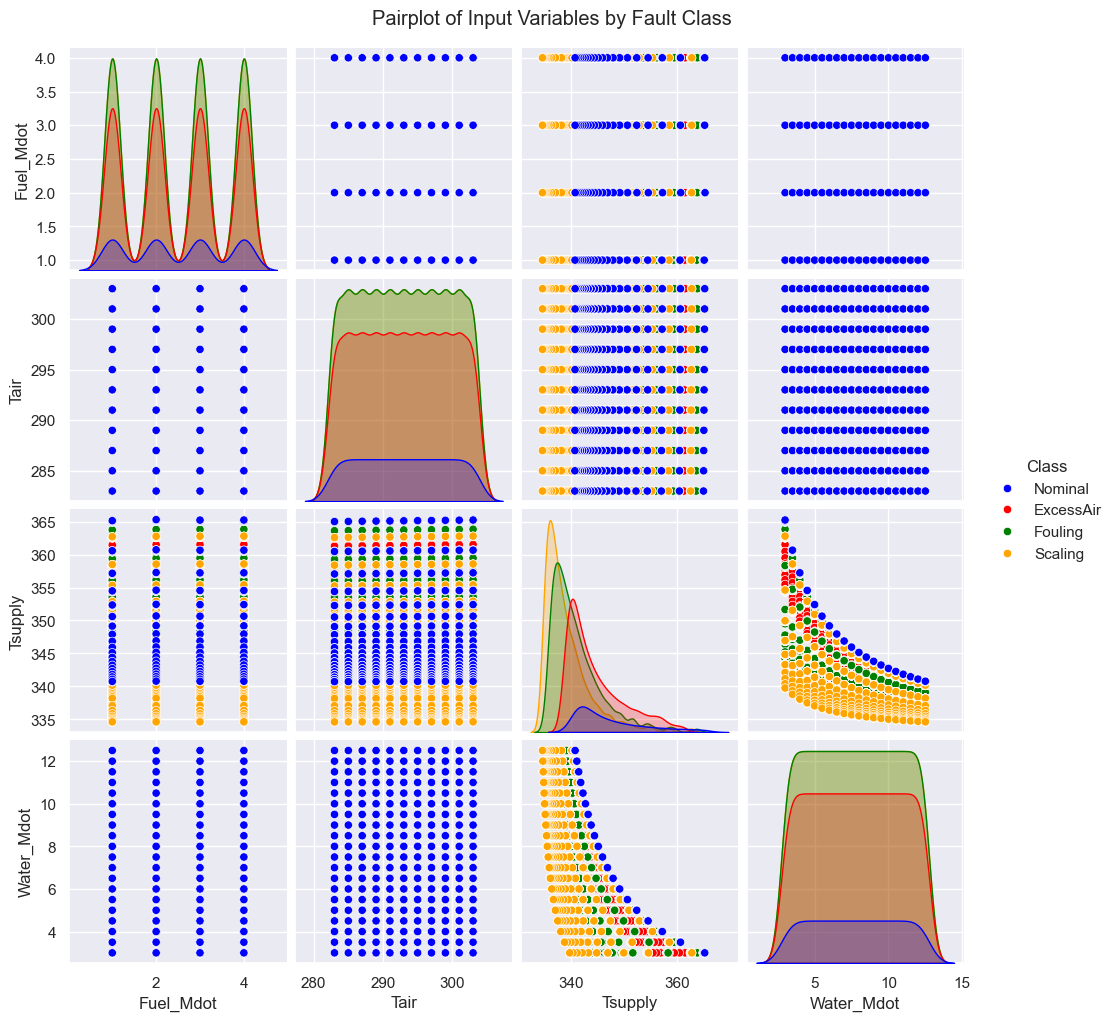

In [11]:
# Pairplot: ดูการกระจายของหลายตัวแปรพร้อมกัน
from seaborn import pairplot

df_plot = data.iloc[:, [0,1,3,4]].copy()
df_plot['Class'] = output_label_text 
sns.pairplot(df_plot, hue='Class', palette=colors)
plt.suptitle("Pairplot of Input Variables by Fault Class", y=1.02)
plt.show()


Model Evaluation

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Tsupply', axis=1)  
y = df['Tsupply']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import LabelEncoder

le_condition = LabelEncoder()
le_class = LabelEncoder()

df['Condition_encoded'] = le_condition.fit_transform(df['Condition'])
df['Class_encoded'] = le_class.fit_transform(df['Class'])


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Boiler_emulator_dataset.txt")

# convert Condition/Class = One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Condition', 'Class'])

X = df_encoded.drop('Tsupply', axis=1)
y = df_encoded['Tsupply']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 5.160798265652909
RMSE: 2.2717390399543933
R²: 0.84789466156521
